In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from natsort import natsorted
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.cm as cm
from pygam import LinearGAM, s, f
from scipy import stats
sns.set(font_scale=1.5, style="white")

In [2]:
indv_adult = pd.read_csv('../Derivatives/adult/H.csv')
motion = pd.read_csv('../Derivatives/adult/plasticity_mri_sample.csv')

In [3]:
FD = []
for x in indv_adult['H_all401'].values:
    FD.append(motion[motion.record_id==x.replace('sub-', '').replace('A', '')]['rest_A_motion'].values[0])

In [4]:
indv_adult['meanFD'] = FD
indv_adult.to_csv('../Derivatives/adult/hurst_motion.csv')

In [5]:
hurst = pd.read_csv('../Derivatives/childhood/hurst.csv')
hurst_sorted = pd.read_csv('../Derivatives/childhood/hurst_sorted.csv')
part = pd.read_csv('../Derivatives/childhood/part.csv')
part_sorted = pd.read_csv('../Derivatives/childhood/part_sorted.csv')
qa = pd.read_csv('../Dataset/childhood/QA_revision.csv')

In [6]:
part_sort = pd.DataFrame()
for x in part_sorted.columns:
    part_sort = pd.concat([part_sort, part.loc[:, x]], axis=1)
part_sort

,part_coef_avg_all_ 19,part_coef_avg_all_233,part_coef_avg_all_ 18,part_coef_avg_all_229,part_coef_avg_all_218,part_coef_avg_all_238,part_coef_avg_all_207,part_coef_avg_all_ 7,part_coef_avg_all_ 11,part_coef_avg_all_211,...,part_coef_avg_all_358,part_coef_avg_all_135,part_coef_avg_all_337,part_coef_avg_all_336,part_coef_avg_all_169,fsid,age_scan,age_square_scan,male,t1_rating_avg
0,0.667785,0.820116,0.741668,0.785783,0.720780,0.764212,0.774277,0.739859,0.732600,0.752086,...,0.717714,0.703306,0.717558,0.756336,0.716000,sub-CBPD0002,6.672165,0.105806,0.0,0.505512
1,0.832291,0.832197,0.831535,0.832054,0.832223,0.832243,0.830556,0.832188,0.831505,0.831762,...,0.832020,0.832324,0.832108,0.832491,0.832479,sub-CBPD0007,4.599798,-1.185560,0.0,1.119947
2,0.798726,0.819013,0.800254,0.797237,0.798417,0.747852,0.801179,0.825422,0.788208,0.822284,...,0.810838,0.812258,0.806842,0.820381,0.812269,sub-CBPD0012,5.106197,-0.913844,1.0,2.348816
3,0.792361,0.803681,0.788820,0.809968,0.760992,0.768928,0.785605,0.796867,0.796841,0.777998,...,0.762886,0.797570,0.806603,0.819571,0.818771,sub-CBPD0015,4.471116,-1.250089,1.0,0.505512
4,0.715381,0.799334,0.789821,0.781184,0.775064,0.770479,0.754350,0.822730,0.807092,0.792481,...,0.690460,0.737806,0.784654,0.751226,0.696221,sub-CBPD0020,7.370332,0.647790,0.0,-0.723357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.812044,0.787647,0.804767,0.792496,0.816403,0.786554,0.822565,0.809229,0.802203,0.809839,...,0.815719,0.823312,0.822669,0.825530,0.791860,sub-CBPD0240,5.434631,-0.722460,1.0,-0.723357
132,0.602414,0.786963,0.756837,0.809645,0.636501,0.739730,0.687993,0.753950,0.748265,0.618871,...,0.768707,0.811976,0.790021,0.805872,0.758344,sub-CBPD0244,6.883098,0.263870,0.0,-0.108923
133,0.829277,0.829068,0.829062,0.830004,0.829191,0.829106,0.829795,0.829623,0.829575,0.834069,...,0.830033,0.829597,0.829848,0.829658,0.830015,sub-CBPD0247,4.011034,-1.465826,0.0,-0.108923
134,0.690729,0.797641,0.708091,0.769907,0.682173,0.786824,0.814622,0.796891,0.690558,0.683040,...,0.764117,0.729087,0.754732,0.769554,0.728386,sub-CBPD0252,7.830528,1.034508,0.0,-0.723357


In [7]:
for x in hurst_sorted.columns:
    hurst_sorted[x] = hurst[x]

In [8]:
qa['fsid'] = ['sub-'+x for x in qa['sub']]

In [9]:
hurst = pd.merge(hurst, qa, on='fsid', how='left')
hurst_sorted = pd.merge(hurst_sorted, qa, on='fsid', how='left')
part = pd.merge(part, qa, on='fsid', how='left')
part_sort = pd.merge(part_sort, qa, on='fsid', how='left')

In [10]:
hurst = hurst[hurst.meanFD<1.1]
hurst_sorted = hurst_sorted[hurst_sorted.meanFD<1.1]
part = part[part.meanFD<1.1]
part_sort = part_sort[part_sort.meanFD<1.1]

In [11]:
hurst['Mean'] = hurst.iloc[:, :400].mean(axis=1)
part['Mean'] = part.iloc[:, :400].mean(axis=1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     30.04
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           2.16e-07
Time:                        08:37:49   Log-Likelihood:                 89.859
No. Observations:                 130   AIC:                            -175.7
Df Residuals:                     128   BIC:                            -170.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2016      0.018     66.545      0.0

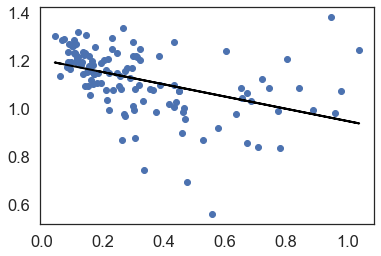

In [12]:
figure = plt.figure()
plt.scatter(hurst.meanFD, hurst.Mean)
df_x = pd.DataFrame(hurst.meanFD.values)
df_y = pd.DataFrame(hurst.Mean.values)
mod = LinearRegression()
mod_lin = mod.fit(df_x, df_y)
y_lin_fit = mod_lin.predict(df_x)
r2_lin = mod.score(df_x, df_y)
plt.plot(df_x[0].values, [y[0] for y in y_lin_fit], color = '#000000', linewidth=2)
X = sm.add_constant(hurst.meanFD.values)
results = sm.OLS(hurst.Mean.values, X).fit()
print(results.summary())
plt.savefig('FD_hurst.eps')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     74.37
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           2.13e-14
Time:                        08:37:50   Log-Likelihood:                 319.33
No. Observations:                 130   AIC:                            -634.7
Df Residuals:                     128   BIC:                            -628.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7710      0.003    249.455      0.0

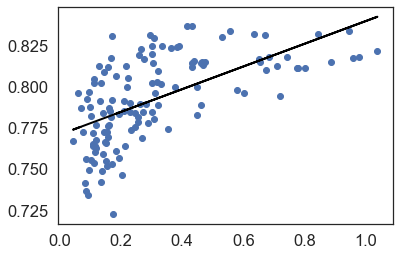

In [13]:
figure = plt.figure()
plt.scatter(part.meanFD, part.Mean)
df_x = pd.DataFrame(part.meanFD.values)
df_y = pd.DataFrame(part.Mean.values)
mod = LinearRegression()
mod_lin = mod.fit(df_x, df_y)
y_lin_fit = mod_lin.predict(df_x)
r2_lin = mod.score(df_x, df_y)
plt.plot(df_x[0].values, [y[0] for y in y_lin_fit], color = '#000000', linewidth=2)
X = sm.add_constant(part.meanFD.values)
results = sm.OLS(part.Mean.values, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     30.04
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           2.16e-07
Time:                        08:37:50   Log-Likelihood:                 89.859
No. Observations:                 130   AIC:                            -175.7
Df Residuals:                     128   BIC:                            -170.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2016      0.018     66.545      0.0

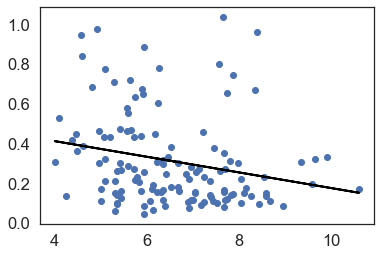

In [14]:
plt.scatter(hurst.age_scan, hurst.meanFD)
df_x = pd.DataFrame(hurst.age_scan.values)
df_y = pd.DataFrame(hurst.meanFD.values)
mod = LinearRegression()
mod_lin = mod.fit(df_x, df_y)
y_lin_fit = mod_lin.predict(df_x)
r2_lin = mod.score(df_x, df_y)
plt.plot(df_x[0].values, [y[0] for y in y_lin_fit], color = '#000000', linewidth=2)
X = sm.add_constant(hurst.meanFD.values)
results = sm.OLS(hurst.Mean.values, X).fit()
print(results.summary())
plt.savefig('age_FD.eps')

In [15]:
hurst.to_csv('../Derivatives/childhood/hurst_motion_1mm.csv', index=False)
hurst[hurst.meanFD<0.5].to_csv('../Derivatives/childhood/hurst_motion_0.5mm.csv', index=False)

In [16]:
hurst_sorted.to_csv('../Derivatives/childhood/hurst_sorted_motion_1mm.csv', index=False)
hurst_sorted[hurst_sorted.meanFD<0.5].to_csv('../Derivatives/childhood/hurst_sorted_motion_0.5mm.csv', index=False)

In [17]:
part.to_csv('../Derivatives/childhood/part_motion_1mm.csv', index=False)
part[part.meanFD<0.5].to_csv('../Derivatives/childhood/part_motion_0.5mm.csv', index=False)

In [36]:
part_sort.to_csv('../Derivatives/childhood/part_sorted_motion_1mm.csv', index=False)
part_sort[part_sort.meanFD<0.5].to_csv('../Derivatives/childhood/part_sorted_motion_0.5mm.csv', index=False)

In [19]:
original = pd.read_csv('../Derivatives/childhood/original.csv')

In [20]:
original['part'] = part.iloc[:, :400].mean().values
original['H'] = hurst.iloc[:, :400].mean().values

In [21]:
original.to_csv('../Derivatives/childhood/original_motion_1mm.csv', index=False)

In [22]:
original['part'] = part[part.meanFD<0.5].iloc[:, :400].mean().values
original['H'] = hurst[hurst.meanFD<0.5].iloc[:, :400].mean().values

In [23]:
original.to_csv('../Derivatives/childhood/original_motion_0.5mm.csv', index=False)

In [24]:
indv = pd.DataFrame([hurst.iloc[:, :400].mean(axis=1).values, part.iloc[:, :400].mean(axis=1).values, hurst.age_scan.values]).T
indv.columns = ['H', 'part', 'age']
indv.to_csv('../Derivatives/childhood/indv_motion_1mm.csv', index=False)
res = stats.pearsonr(indv.H, indv.part)
print(res)

PearsonRResult(statistic=-0.37943432662244564, pvalue=8.503979134942717e-06)


In [25]:
indv = pd.DataFrame([hurst[hurst.meanFD<0.5].iloc[:, :400].mean(axis=1).values, part[part.meanFD<0.5].iloc[:, :400].mean(axis=1).values, hurst[hurst.meanFD<0.5].age_scan.values, hurst[hurst.meanFD<0.5].meanFD.values]).T
indv.columns = ['H', 'part', 'age', 'meanFD']
indv.to_csv('../Derivatives/childhood/indv_motion_0.5mm.csv', index=False)
res = stats.pearsonr(indv.H, indv.part)
print(res)

PearsonRResult(statistic=-0.3229576843999772, pvalue=0.0006518924236974257)


In [26]:
res = stats.pearsonr(original.H, original.part)
print(res)

PearsonRResult(statistic=-0.40394513113577935, pvalue=3.932248534040872e-17)


In [34]:
part_sort[part_sort.meanFD<0.5]

,part_coef_avg_all_ 19,part_coef_avg_all_233,part_coef_avg_all_ 18,part_coef_avg_all_229,part_coef_avg_all_218,part_coef_avg_all_238,part_coef_avg_all_207,part_coef_avg_all_ 7,part_coef_avg_all_ 11,part_coef_avg_all_211,...,summary_bg_stdv,summary_fg_k,summary_fg_mad,summary_fg_mean,summary_fg_median,summary_fg_n,summary_fg_p05,summary_fg_p95,summary_fg_stdv,tsnr
0,0.667785,0.820116,0.741668,0.785783,0.720780,0.764212,0.774277,0.739859,0.732600,0.752086,...,529.672791,1.485818,2238.323975,6667.644043,6150.293457,184325.0,3521.165479,11723.705664,2582.128906,45.455097
2,0.798726,0.819013,0.800254,0.797237,0.798417,0.747852,0.801179,0.825422,0.788208,0.822284,...,409.787079,2.643397,1787.059082,6153.074707,5643.899902,155701.0,3470.400146,10790.313477,2323.387451,29.620218
3,0.792361,0.803681,0.788820,0.809968,0.760992,0.768928,0.785605,0.796867,0.796841,0.777998,...,493.584564,0.961883,2022.042114,6332.037598,5906.000000,164623.0,3461.002002,10870.693652,2295.586182,30.745888
4,0.715381,0.799334,0.789821,0.781184,0.775064,0.770479,0.754350,0.822730,0.807092,0.792481,...,526.217957,1.045971,2603.073730,7062.851562,6531.363281,152726.0,3425.580017,12700.920410,2887.942139,43.395550
5,0.699140,0.780423,0.752811,0.780126,0.705572,0.833969,0.790659,0.809567,0.762565,0.736273,...,539.676270,0.377823,2251.440186,6289.799805,5945.160156,162657.0,3091.537354,10509.381641,2328.155273,32.265621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.812044,0.787647,0.804767,0.792496,0.816403,0.786554,0.822565,0.809229,0.802203,0.809839,...,600.041199,1.476619,3580.479492,8631.754883,7499.411133,177994.0,3652.290100,17697.021387,4399.674805,43.856277
132,0.602414,0.786963,0.756837,0.809645,0.636501,0.739730,0.687993,0.753950,0.748265,0.618871,...,444.726135,2.442540,2127.348145,6492.966309,5793.188477,178272.0,3304.704346,12236.757275,2827.880127,48.770721
133,0.829277,0.829068,0.829062,0.830004,0.829191,0.829106,0.829795,0.829623,0.829575,0.834069,...,535.796875,1.779261,2905.483398,8100.630859,6787.892090,140227.0,3736.349438,16814.465039,4144.083984,31.808510
134,0.690729,0.797641,0.708091,0.769907,0.682173,0.786824,0.814622,0.796891,0.690558,0.683040,...,562.420288,1.858817,2363.249268,6916.697266,6214.916504,160617.0,3464.537207,13074.854297,3002.312256,39.843750


In [28]:
adult_indv = pd.read_csv('../Derivatives/adult/H.csv')

In [29]:
adultH = adult_indv.iloc[:, :400].mean(axis=1).values

In [30]:
childH = indv['H'].values

In [31]:
stats.ttest_ind(adultH, childH)

Ttest_indResult(statistic=3.654877524392697, pvalue=0.00035379349346876556)